### Load Data
Right now our data is in a bunch of csv files. We can combine them and load them all into one pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from glob import glob
import os
import statsmodels.api as sm

exp_dir = r'C:\Users\letmedoit\endothelial Polarization-exp 1'

csv_files = glob(os.path.join(exp_dir, "csvfiles/*.csv"))


df_in_each_file = (pd.read_csv(f) for f in csv_files)
df = pd.concat(df_in_each_file, ignore_index=True)

C:\Users\letmedoit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Look at data
We can use `df.head()`, `df.info()`, and `df.describe()` to quickly get a sense of our data.

In [2]:
df.head()

,ROICentroidsXInPixels,ROICentroidsYInPixels,anglesInDeg,anglesInRad,fileID,golgiAreaInSquareMicrons,golgiCentroidsXInPixels,golgiCentroidsYInPixels,golgiPerimeterInMicrons,nucleiAreaInSquareMicrons,nucleiCentroidsXInPixels,nucleiCentroidsYInPixels,nucleiPerimeterInMicrons
0,111,111,-0.28,-0.00,Animal 1_2hrs_003,2.83,108.97,199.75,9.44,127.97,108.53,108.94,43.90
1,111,111,-45.93,-0.80,Animal 1_2hrs_003,54.40,128.67,127.50,67.98,85.94,91.94,91.95,38.90
2,111,111,35.85,0.63,Animal 1_2hrs_003,37.14,69.05,164.36,52.75,104.75,110.42,107.10,40.54
3,111,111,36.05,0.63,Animal 1_2hrs_003,47.37,77.34,178.67,47.12,44.89,110.68,132.88,31.10
4,111,111,6.12,0.11,Animal 1_2hrs_004,0.45,108.08,215.87,3.21,142.37,119.11,113.00,49.64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
ROICentroidsXInPixels        935 non-null int64
ROICentroidsYInPixels        935 non-null int64
anglesInDeg                  935 non-null float64
anglesInRad                  935 non-null float64
fileID                       935 non-null object
golgiAreaInSquareMicrons     935 non-null float64
golgiCentroidsXInPixels      935 non-null float64
golgiCentroidsYInPixels      935 non-null float64
golgiPerimeterInMicrons      935 non-null float64
nucleiAreaInSquareMicrons    935 non-null float64
nucleiCentroidsXInPixels     935 non-null float64
nucleiCentroidsYInPixels     935 non-null float64
nucleiPerimeterInMicrons     935 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 95.0+ KB


In [4]:
df.describe()

,ROICentroidsXInPixels,ROICentroidsYInPixels,anglesInDeg,anglesInRad,golgiAreaInSquareMicrons,golgiCentroidsXInPixels,golgiCentroidsYInPixels,golgiPerimeterInMicrons,nucleiAreaInSquareMicrons,nucleiCentroidsXInPixels,nucleiCentroidsYInPixels,nucleiPerimeterInMicrons
count,935.0,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,111.0,111.0,5.292727,0.092449,47.548182,101.955230,160.775626,68.866674,142.486963,107.617754,106.805444,57.334706
std,0.0,0.0,52.387139,0.914315,33.470697,46.335802,35.861204,43.743325,62.443822,13.785786,13.072949,21.348090
min,111.0,111.0,-175.760000,-3.070000,0.120000,0.810000,20.610000,0.950000,0.010000,41.090000,51.810000,0.000000
25%,111.0,111.0,-25.370000,-0.440000,27.970000,65.805000,147.230000,41.070000,101.905000,100.445000,99.530000,43.595000
50%,111.0,111.0,6.640000,0.120000,44.380000,100.020000,168.580000,64.840000,133.340000,107.350000,106.390000,53.120000
75%,111.0,111.0,35.980000,0.630000,63.720000,135.970000,184.600000,94.760000,179.810000,114.590000,113.785000,66.055000
max,111.0,111.0,178.730000,3.120000,279.010000,217.320000,220.400000,263.970000,378.730000,151.110000,176.520000,176.950000


### Add columns for later

We can use the `fileID` column as our source of animal ID.


In [5]:
df['animal_id'] = df.fileID.str.split('_', expand=True).get(0)
print('number of animals: {}'. format(df['animal_id'].nunique()))
df['animal_id'].head()

number of animals: 2


0    Animal 1
1    Animal 1
2    Animal 1
3    Animal 1
4    Animal 1
Name: animal_id, dtype: object

Same stuff with the timing info

In [6]:
df['time'] = df.fileID.str.split('_', expand=True).get(1)
print('number of times: {}'. format(df['time'].nunique()))
df['time'].head()

number of times: 3


0    2hrs
1    2hrs
2    2hrs
3    2hrs
4    2hrs
Name: time, dtype: object

## Check for obvious correlations

We can check for any obvious correlations using a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B64D828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C268780>]], dtype=object)

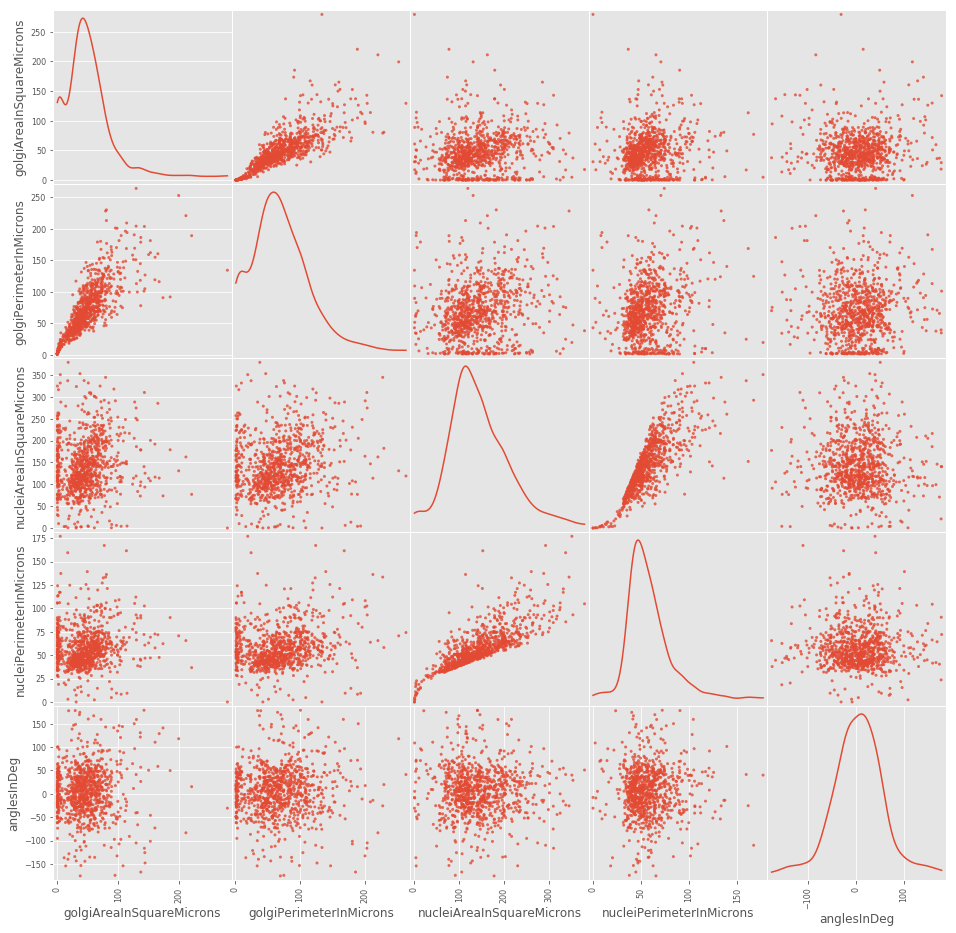

In [7]:
from pandas.plotting import scatter_matrix

dfa = df[['golgiAreaInSquareMicrons',
            'golgiPerimeterInMicrons',
            'nucleiAreaInSquareMicrons',
            'nucleiPerimeterInMicrons',
            'anglesInDeg']]

scatter_matrix(dfa, alpha=0.8, figsize=(16,16), diagonal='kde')

### Thoughts on scatter matrix

- As expected, areas and perimeters are correlated.
    - Let's drop the perimeter columns and use area from now on.
- No obvious correlation between angles and other parameters.
- No obvious correlation between nuclei area/perimeter and other variables. (Good! We don't expect DEE to change nuclei at all.)
- There are a number of misreconstructed golgi as seen by the stacking at 0 area/perimeter.
    - These will be filtered out
- The orientation angles between the golgi and the nuclei look somewhat Gaussian in nature.


## Make new dataframe

In [8]:
new_df = df.filter(['golgiAreaInSquareMicrons',
                   'anglesInDeg',
                   'nucleiAreaInSquareMicrons',
                   'time',
                   'animal_id'],
                  axis=1)

### Look at misreconstructed Golgi

Text(0.5,1,'Closer look at Golgi Area Histogram')

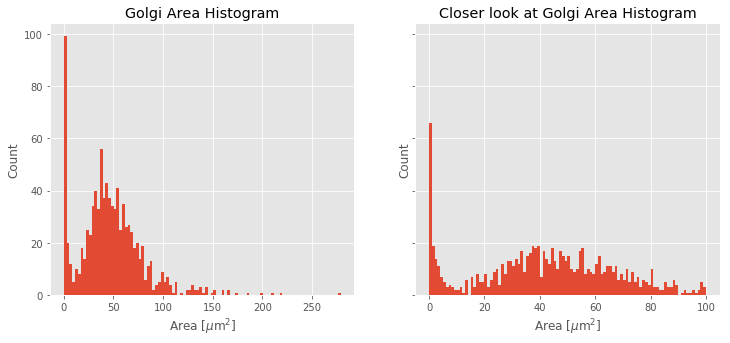

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

new_df.golgiAreaInSquareMicrons.hist(bins=100, ax=ax[0])
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Count')
ax[0].set_title('Golgi Area Histogram')

new_df.golgiAreaInSquareMicrons.hist(bins=100, ax=ax[1],
                                     range=[0, 100])
ax[1].set_xlabel('Area [$\mu$m$^2$]')
ax[1].set_ylabel('Count')
ax[1].set_title('Closer look at Golgi Area Histogram')

10 microns seems like a reasonable value for our golgi area floor.

We can also set a ceiling

In [10]:
area_at_least_10_microns_squared = new_df.golgiAreaInSquareMicrons >= 10
area_below_100_microns_squared = new_df.golgiAreaInSquareMicrons < 100

golgi_area_cut = area_at_least_10_microns_squared & area_below_100_microns_squared

In [11]:
n_start = len(new_df.golgiAreaInSquareMicrons)
n_remaining_after_floor_cut = np.sum(area_at_least_10_microns_squared)
percent_remaining = round(n_remaining_after_floor_cut/n_start * 100 , 1)

print('values at start : {}'.format(n_start))
print('values after area floor cut : {}'.format(n_remaining_after_floor_cut))
print('% remaining : {}%'.format(percent_remaining))

values at start : 935
values after area floor cut : 801
% remaining : 85.7%


In [12]:
n_start = len(new_df.golgiAreaInSquareMicrons)
n_remaining_after_area_cut = np.sum(golgi_area_cut)
percent_remaining = round(n_remaining_after_area_cut/n_start * 100 , 1)

print('values at start : {}'.format(n_start))
print('values after area cut : {}'.format(n_remaining_after_area_cut))
print('% remaining : {}%'.format(percent_remaining))

values at start : 935
values after area cut : 745
% remaining : 79.7%


In [13]:
is_animal1 = new_df.animal_id == 'Animal 1'
is_animal2 = new_df.animal_id == 'Animal 2'

animal1 = new_df[golgi_area_cut & is_animal1]
animal2 = new_df[golgi_area_cut & is_animal2]

Text(0.5,1,'Animal 2 Golgi Area')

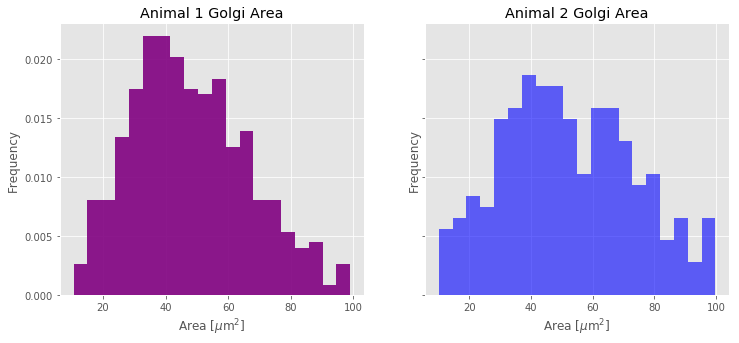

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

animal1.golgiAreaInSquareMicrons.hist(bins=20,
                                      ax=ax[0],
                                      normed=True,
                                      color = 'purple',
                                      alpha=0.9
                                     )
ax[0].set_xlabel('Area [$\mu$m$^2$]')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Animal 1 Golgi Area')

animal2.golgiAreaInSquareMicrons.hist(bins=20,
                                      ax=ax[1],
                                      normed=True,
                                      color='blue',
                                      alpha=0.6
                                     )
ax[1].set_xlabel('Area [$\mu$m$^2$]')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Animal 2 Golgi Area')

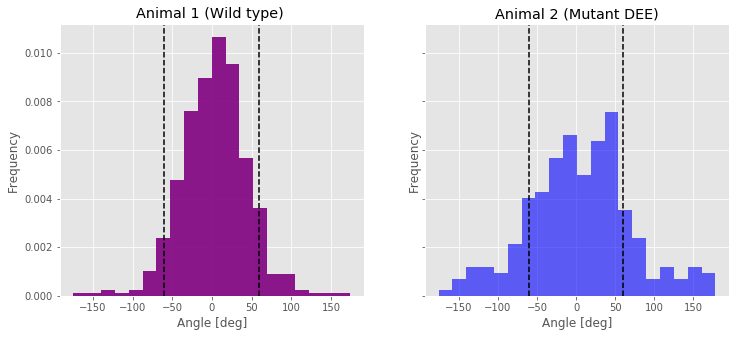

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax = axes.ravel()

animal1.anglesInDeg.hist(bins=20,
                         ax=ax[0],
                         normed=True,
                        color = 'purple',
                        alpha=0.9)
ax[0].set_xlabel('Angle [deg]')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Animal 1 (Wild type) ')
ax[0].axvline(-60, color='k',linestyle='--')
ax[0].axvline(60, color='k',linestyle='--')

animal2.anglesInDeg.hist(bins=20,
                         ax=ax[1],
                         normed=True,
                        color='blue',
                        alpha=0.6)
ax[1].set_xlabel('Angle [deg]')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Animal 2 (Mutant DEE)')

ax[1].axvline(-60, color='k',linestyle='--')
ax[1].axvline(60, color='k',linestyle='--')


### Separate by time

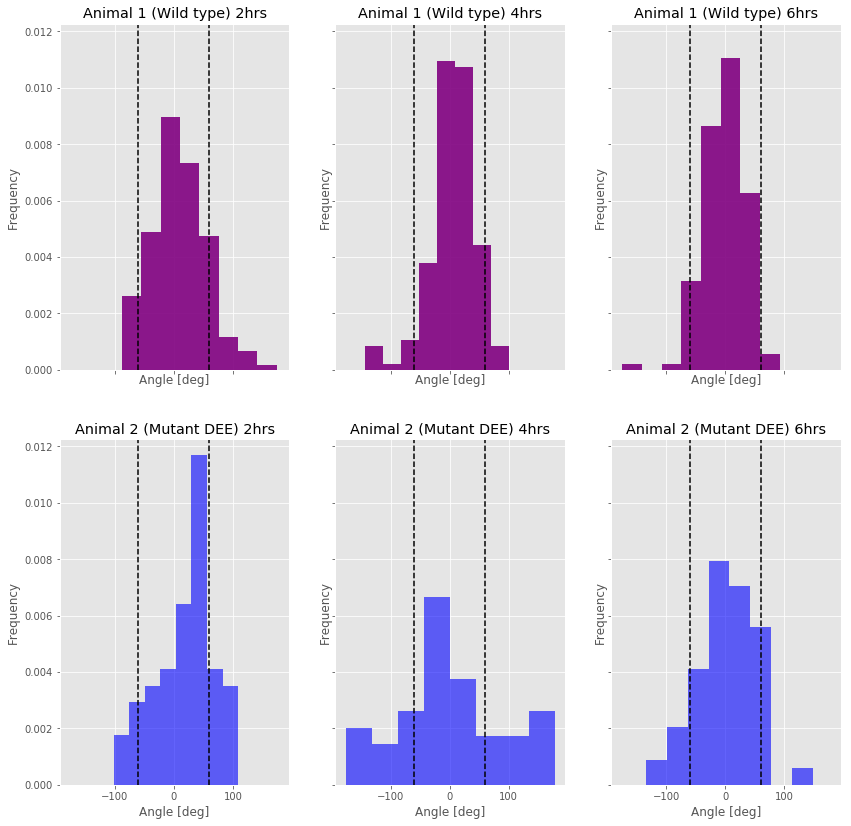

In [16]:
fig, axes = plt.subplots(2,3, figsize=(14,14), sharey=True, sharex=True)
ax = axes.ravel()
times = ['2hrs', '4hrs', '6hrs']

for i, time in enumerate(times):
    ax[i] = animal1[animal1.time == time].anglesInDeg.hist(bins=8,
                                                           ax=ax[i],
                                                           normed=True,
                                                           color = 'purple',
                                                           alpha=0.9
                                                          )
    
    ax[i+3] = animal2[animal2.time == time].anglesInDeg.hist(bins=8,
                                                             ax=ax[i+3],
                                                             normed=True,
                                                             color='blue',
                                                             alpha=0.6
                                                            )
    ax[i].set_xlabel('Angle [deg]')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title('Animal 1 (Wild type) {}'.format(time))
    ax[i].axvline(-60, color='k',linestyle='--')
    ax[i].axvline(60, color='k',linestyle='--')
    
    ax[i+3].set_xlabel('Angle [deg]')
    ax[i+3].set_ylabel('Frequency')
    ax[i+3].set_title('Animal 2 (Mutant DEE) {}'.format(time))
    ax[i+3].axvline(-60, color='k',linestyle='--')
    ax[i+3].axvline(60, color='k',linestyle='--')
    

## Orientation percentage

In [17]:
def orientation_percent(animal_data_frame, want_ratio=False):
    angles = animal_data_frame.anglesInDeg
    is_oriented = np.abs(angles) <= 60.
    n_angles = len(angles)
    n_angles_after_orientation_cut = np.sum(is_oriented)

    ratio_oriented = n_angles_after_orientation_cut/n_angles
    percent_oriented = round(ratio_oriented * 100 ,2)
    
    if want_ratio:
        return ratio_oriented
    else:
        return percent_oriented

In [18]:
orientation_percent_animal1 = orientation_percent(animal1)
orientation_percent_animal2 = orientation_percent(animal2)

print("Cumulative over all times")
print("animal 1 orientation : {}%".format(orientation_percent_animal1))
print("animal 2 orientation : {}%".format(orientation_percent_animal2))


Cumulative over all times
animal 1 orientation : 87.94%
animal 2 orientation : 68.2%


In [19]:
def sample_proportion_error(p, n):
    """Returns the error for a sample proportion
    https://onlinecourses.science.psu.edu/stat100/node/56
    
    p: [float] 
        Proportion
    n: [int]
        Number of datapoints
    """
    return np.sqrt(p*(1-p) / n)

In [20]:
animal1_orientation = []
animal2_orientation = []

animal1_errors = []
animal2_errors = []

for time in times:
    n1 = len(animal1[animal1.time == time])
    n2 = len(animal2[animal2.time == time])
    orientation_percent_animal1 = orientation_percent(animal1[animal1.time == time])
    orientation_percent_animal2 = orientation_percent(animal2[animal2.time == time])
    
    animal1_orientation.append(orientation_percent_animal1)
    animal2_orientation.append(orientation_percent_animal2)
    
    ratio_animal1 = orientation_percent(animal1[animal1.time == time], want_ratio=True)
    ratio_animal2 = orientation_percent(animal2[animal2.time == time], want_ratio=True)
    
    serr1 = sample_proportion_error(ratio_animal1, n1)
    serr2 = sample_proportion_error(ratio_animal2, n2)
    
    animal1_errors.append(sample_proportion_error(ratio_animal1, n1)*100)
    animal2_errors.append(sample_proportion_error(ratio_animal2, n2)*100)
    
    print("{}".format(time))
    
    print("With N = {}, animal 1 orientation : {}% +/- {}%".format(n1,
        int(orientation_percent_animal1), round(serr1*100,1)))
    print("With N = {}, animal 2 orientation : {}% +/- {}%".format(n2,
        int(orientation_percent_animal2), round(serr2*100,1)))
    
    print("\n")

2hrs
With N = 187, animal 1 orientation : 82% +/- 2.8%
With N = 65, animal 2 orientation : 73% +/- 5.5%


4hrs
With N = 156, animal 1 orientation : 87% +/- 2.6%
With N = 78, animal 2 orientation : 55% +/- 5.6%


6hrs
With N = 163, animal 1 orientation : 94% +/- 1.8%
With N = 96, animal 2 orientation : 75% +/- 4.4%




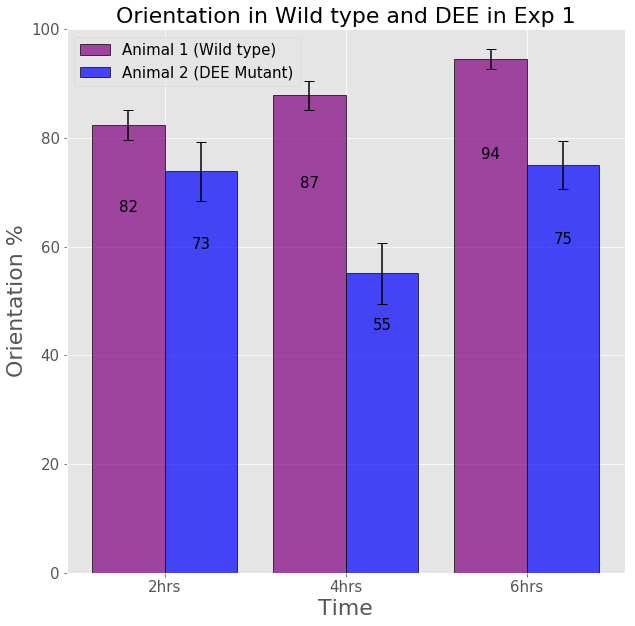

In [21]:
plt.style.use('ggplot')
plt.rc('axes', titlesize = 22)
plt.rc('axes', labelsize = 22)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    # Shamelessly taken from https://matplotlib.org/examples/api/barchart_demo.html
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.80*height,
                '%d' % round(float(height),2),
                ha='center', va='bottom', size=15)

n_groups = 3
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.7

rects1 = plt.bar(index, animal1_orientation,
                 bar_width,
                alpha=opacity,
                color='purple',
                label='Animal 1 (Wild type)',
                yerr = animal1_errors,
                 capsize=5,
                edgecolor='k',
                linewidth=1)
#plt.errorbar(index, animal1_errors, barsabove=True)
rects2 = plt.bar(index + bar_width, animal2_orientation,
                 bar_width,
                alpha=opacity,
                color='blue',
                label='Animal 2 (DEE Mutant)',
                yerr = animal2_errors,
                capsize=5,
                edgecolor='k',
                linewidth=1)

autolabel(rects1)
autolabel(rects2)
plt.xlabel("Time")
plt.ylabel("Orientation %")
plt.title("Orientation in Wild type and DEE in Exp 1")
plt.xticks(index + bar_width/2, tuple(times))
plt.ylim([0,100])
plt.legend(fontsize=15)

Error bars reflect a 68% confidence interval.